In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
from sklearn import datasets, model_selection, tree, ensemble

In [9]:
data = datasets.load_digits()

In [35]:
X = data['data']
y = data['target']
int(sqrt(X.shape[1]))

8

In [11]:
estimator = tree.DecisionTreeClassifier()

In [21]:
score1 = model_selection.cross_val_score(estimator=estimator, X=X, y=y, cv=10)

In [22]:
ans1 = score1.mean()

In [18]:
bagging_classifier = ensemble.BaggingClassifier(estimator, n_estimators=100)

In [24]:
score2 = model_selection.cross_val_score(estimator=bagging_classifier, X=X, y=y, cv=10)

In [25]:
ans2 = score2.mean()
ans2

0.9238823046607927

In [26]:
with open('ans2.txt', 'w') as fout:
    fout.write(str(ans2))

In [41]:
custom_bagging_classifier = ensemble.BaggingClassifier(estimator, max_features=int(sqrt(X.shape[1])), n_estimators=100)

In [42]:
score3 = model_selection.cross_val_score(estimator=custom_bagging_classifier, X=X, y=y, cv=10)

In [43]:
ans3 = score3.mean()

In [45]:
with open('ans3.txt', 'w') as fout:
    fout.write(str(ans3))

In [50]:
rf_estimator = tree.DecisionTreeClassifier(max_features=int(sqrt(X.shape[1])))
rf_bagging_classifier = ensemble.BaggingClassifier(rf_estimator, n_estimators=100)

In [51]:
score4 = model_selection.cross_val_score(estimator=rf_bagging_classifier, X=X, y=y, cv=10)
ans4 = score4.mean()
ans4

0.9555435722622108

In [52]:
with open('ans4.txt', 'w') as fout:
    fout.write(str(ans4))

In [58]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators=100)

In [59]:
model_selection.cross_val_score(estimator=rf_classifier, X=X, y=y, cv=10).mean()

0.9499621815985468

In [72]:
def score(estimator):
    return model_selection.cross_val_score(estimator=estimator, X=X, y=y, cv=10, n_jobs=-1).mean()

In [73]:
n_estimators = 100
max_features = int(sqrt(X.shape[1]))
max_depth = 2

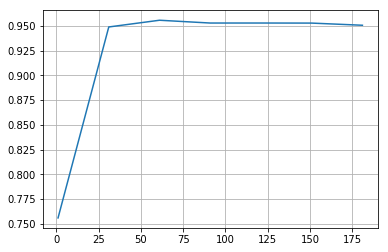

In [74]:
n_estimators_grid = range(1, 200, 30)
quality = []
for n_estimators in n_estimators_grid:
    classifier = ensemble.RandomForestClassifier(n_estimators=n_estimators)
    quality.append(score(classifier))

plt.grid(True)
plt.plot(n_estimators_grid, quality)

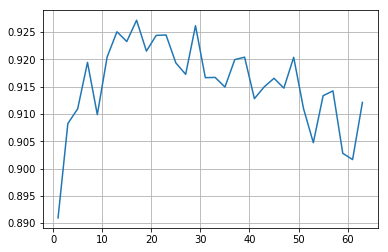

In [83]:
max_features_grid = range(1, int(X.shape[1]), 2)
quality = []
for max_features in max_features_grid:
    classifier = ensemble.RandomForestClassifier(max_features=max_features)
    quality.append(score(classifier))

plt.grid(True)
plt.plot(max_features_grid, quality)

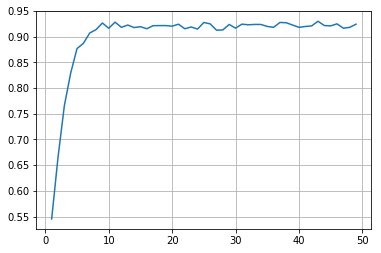

In [85]:
max_depth_grid = range(1, 50)
quality = []
for max_depth in max_depth_grid:
    classifier = ensemble.RandomForestClassifier(max_depth=max_depth)
    quality.append(score(classifier))

plt.grid(True)
plt.plot(max_depth_grid, quality)

In [86]:
with open('ans5.txt', 'w') as fout:
    fout.write('2 3 4 7')